# Intensity Controller

In this notebook we are going to evaluate and assess the signal quality of the intensity controller.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import dates as mdates

## Source

In [2]:
long = pd.read_hdf('../dataset/signal/control.h5', 'long')
long.time = pd.to_datetime(long.time, format='%Y-%m-%d_%H%M%S')

short = pd.read_hdf('../dataset/signal/control.h5', 'short')
short.time = pd.to_datetime(short.time, format='%Y-%m-%d_%H%M%S')

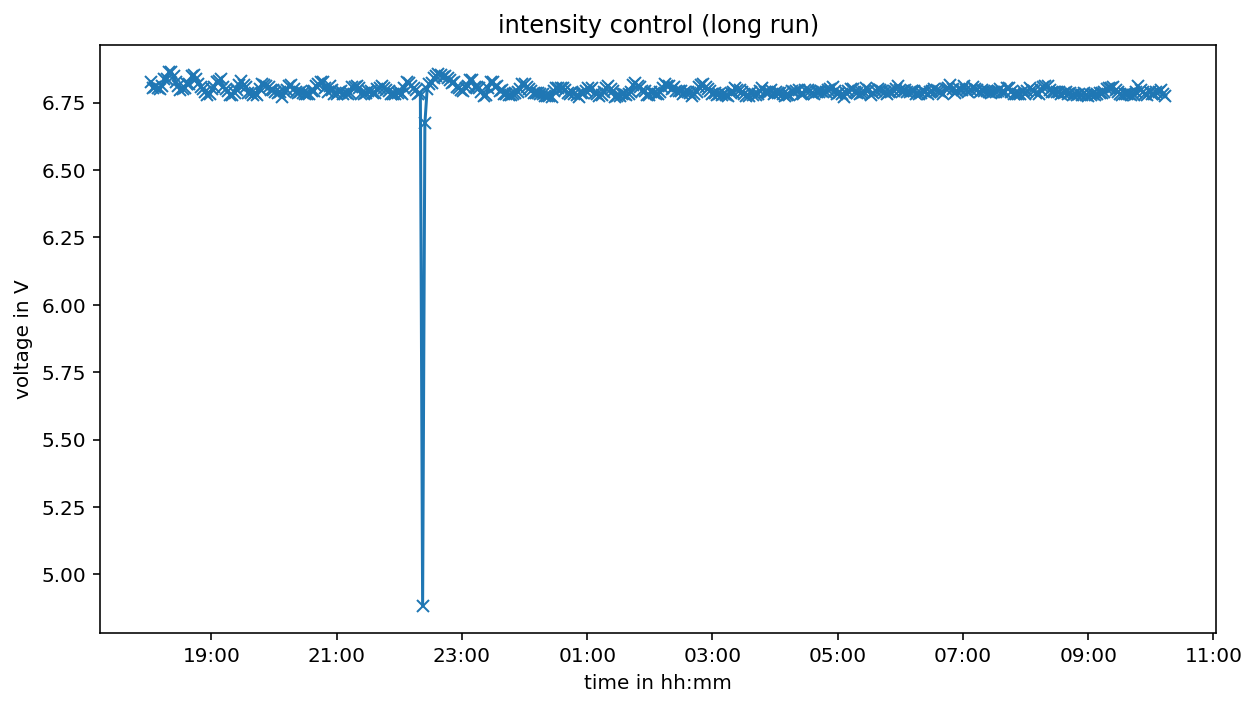

In [5]:
fig = plt.figure(figsize=(10, 6))
fig.autofmt_xdate()

axis = fig.add_subplot(111)
axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.set_title('intensity control (long run)')
axis.set_xlabel('time in hh:mm')
axis.set_ylabel('voltage in V')
axis.plot(long.time.astype('O'), long.voltage, marker='x')

plt.show()

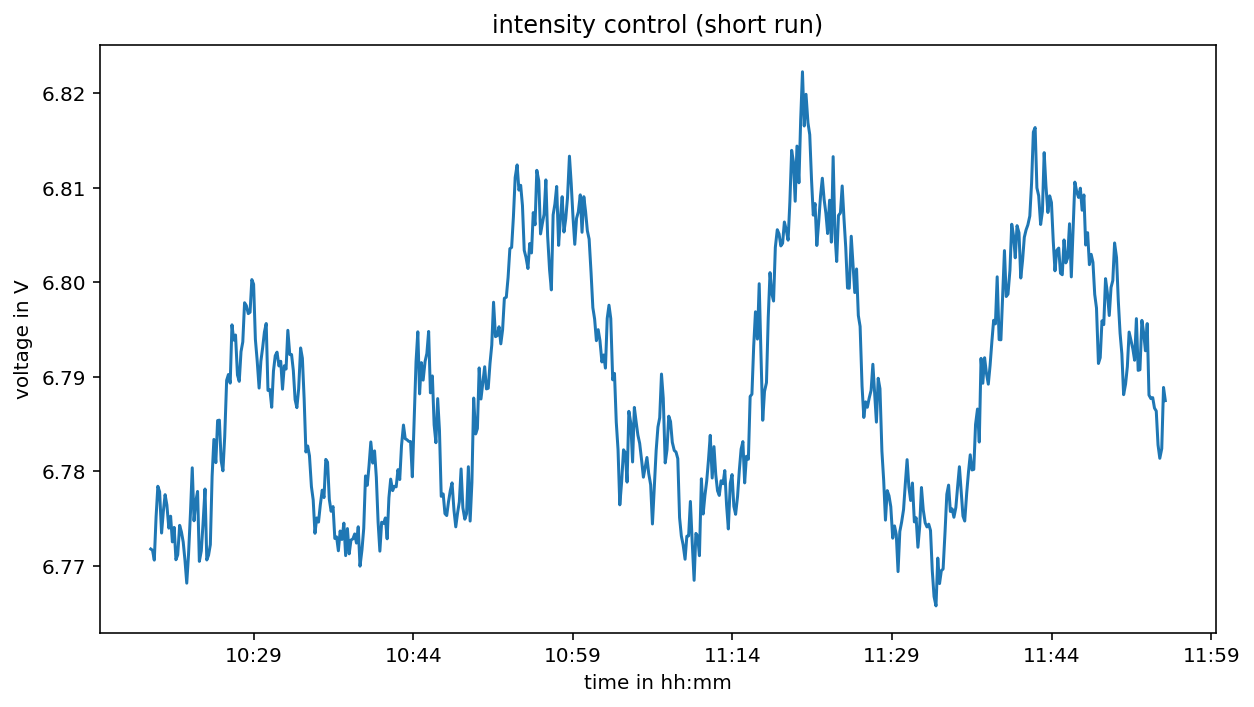

In [14]:
fig = plt.figure(figsize=(10, 6))
fig.autofmt_xdate()

axis = fig.add_subplot(111)
axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.set_title('intensity control (short run)')
axis.set_xlabel('time in hh:mm')
axis.set_ylabel('voltage in V')
axis.plot(short.time.astype('O'), short.voltage)

plt.show()

In [18]:
long.voltage.mean(), long.voltage.min(), long.voltage.max(), long.voltage.std()

(6.790721721811591, 4.883208036031497, 6.864006856101877, 0.09186888609865777)

In [17]:
short.voltage.mean(), short.voltage.min(), short.voltage.max(), short.voltage.std()

(6.789301355971451, 6.765777897547424, 6.822276358793229, 0.012768993779543474)

We compare these results with usual the usual intensity precision observed during measurements. We choose the paired measurements as these require a higher sensitivity then the unpaired ones.

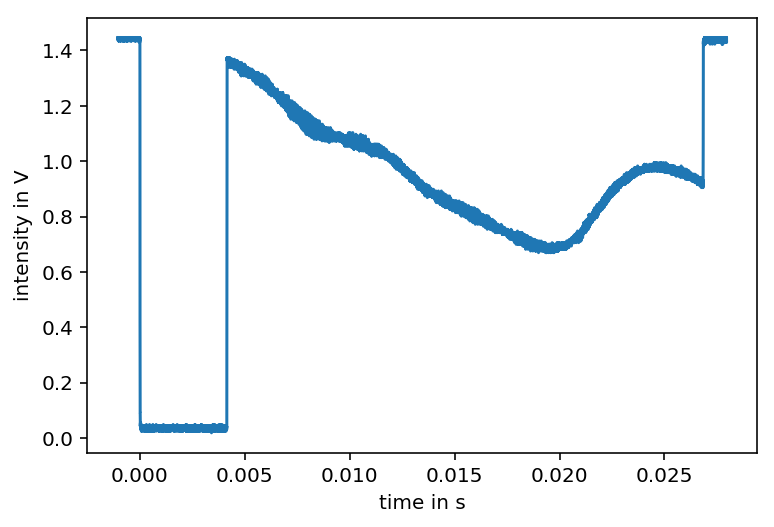

In [24]:
df = pd.read_hdf('../dataset/intensity/paired-anticipated-frequency.h5', 'vsweep')

t = df.time
U = df['voltage@100000000.00']

plt.plot(t, U)
plt.xlabel('time in s')
plt.ylabel('intensity in V')
plt.show()

In [25]:
U.mean(), U.min(), U.max(), U.std()

(0.861120101453624, 0.01888834880000001, 1.44683845184, 0.39522539288818503)

In [27]:
dU1 = short.voltage.max() - short.voltage.min()
dU2 = U.max() - U.min()

dU1, dU2, dU1 / dU2

(0.05649846124580549, 1.42795010304, 0.03956613128534705)

For typical measurements we can expect an error of about 4% due to intensity variations.